In [32]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt

ZADANIE 1

In [33]:
df_pd = pd.read_html('https://www.tiobe.com/tiobe-index/')
df_pd = df_pd[0]
df_pd.drop(df_pd[['Programming Language', 'Change']], axis=1, inplace=True)
df = pl.from_pandas(df_pd)
df.head()


Nov 2025,Nov 2024,Programming Language.1,Ratings,Change.1
i64,i64,str,str,str
1,1,"""Python""","""23.37%""","""+0.52%"""
2,4,"""C""","""9.68%""","""+0.67%"""
3,2,"""C++""","""8.95%""","""-1.69%"""
4,3,"""Java""","""8.54%""","""-1.06%"""
5,5,"""C#""","""7.65%""","""+2.67%"""


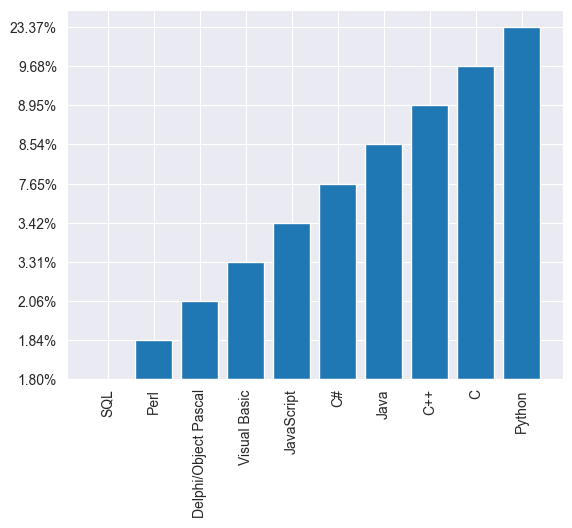

Najwiekszy awans: C#
Najwiekszy spadek: C++


In [58]:
top10 = df.head(10)
top10 = top10.reverse()
dataX = top10.select("Programming Language.1").transpose().rows()[0]
dataY = top10.select("Ratings").transpose().rows()[0]

plt.bar(range(len(dataX)), dataY)
plt.xticks(range(len(dataX)), dataX, rotation=90)
plt.show()

df = df.with_columns(
    pl.col("Change.1").cast(pl.Utf8).str.replace("%", "").cast(pl.Float64),
)
max_improve = df.sort("Change.1", descending=True).select("Programming Language.1", "Change.1").row(0)
max_drop = df.sort("Change.1", descending=False).select("Programming Language.1", "Change.1").row(0)
print(f"Najwiekszy awans: {max_improve[0]}")
print(f"Najwiekszy spadek: {max_drop[0]}")

ZADANIE 2